In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", context="notebook")
#plt.style.use('dark_background')

In [3]:
def get_quantile(df, q_num=4):
    d = df.copy()
    d['Q'] = pd.qcut(d['mean'], q_num, labels=False)
    return d

In [4]:
def get_grouped_desc_2(file):
    desc = pd.read_csv(file, sep=';', index_col='id', skipinitialspace=True)
    desc.head()
    
    volume = desc[desc['desc'].str.match('Volume')]
    area = desc[desc['desc'].str.match('Area')]
    grey_white = desc[desc['desc'].str.match('Grey-white')]
    mean_thickness = desc[desc['desc'].str.match('Mean thickness')]
    mean_intensity = desc[desc['desc'].str.match('Mean intensity')]

    return {
            'volume':volume, 
            'area':area, 
            'grey white':grey_white, 
            'mean thickness':mean_thickness,
            'mean intensity': mean_intensity}

In [5]:
def get_grouped_desc(desc_file, multi_r2, multi_mse, name='result', write_result=False):
    desc = pd.read_csv(desc_file, index_col='id')
    r2 = pd.read_csv(multi_r2).iloc[[-1]].T # select the last entry
    mse = pd.read_csv(multi_mse).iloc[[-1]].T

    mse.columns =['mse']
    mse.index.name = 'id'
    mse.index = mse.index.astype(int)

    r2.columns=['r2']
    r2.index.name = 'id'
    r2.index = r2.index.astype(int)

    joined = r2.join(mse, on='id', how='left')
    desc = desc.join(joined, on='id', how='left')

    if write_result:
        desc.to_csv('results/'+name+'.csv', sep=';',doublequote=False, escapechar='\t')

    volume = desc[desc['desc'].str.match('Volume')]
    area = desc[desc['desc'].str.match('Area')]
    grey_white = desc[desc['desc'].str.match('Grey-white')]
    mean_thickness = desc[desc['desc'].str.match('Mean thickness')]
    mean_intensity = desc[desc['desc'].str.match('Mean intensity')]

    # print('total : {}'.format(volume.shape[0] + area.shape[0] + grey_white.shape[0] + mean_thickness.shape[0] + mean_intensity.shape[0]))
    return {
        'volume':volume, 
        'area':area, 
        'grey white':grey_white, 
        'mean thickness':mean_thickness,
        'mean intensity': mean_intensity}

In [6]:
def boxplot(result_list, names, q_num=4, group='volume', title=''):
    q = list()
    for i in range(len(result_list)):
        df = get_quantile(result_list[i][group], q_num=q_num)
        df['model'] = names[i]
        q.append(df[['r2', 'mse', 'Q', 'model']].reset_index(drop=True))

    ret = q[0]
    for i in range(1, len(q)):
        ret = pd.concat([ret, q[i]], axis=0)
    
    fig, ax = plt.subplots(ncols=1, nrows=1)

    #sns.boxplot(data=ret, x='Q', y='r2', hue='model', ax=ax[0])
    sns.boxplot(data=ret, x='Q', y='r2', hue='model', ax=ax)
    #sns.boxplot(data=ret, x='Q', y='mse', hue='model', ax=ax[1])   

    fig.set_size_inches(10,5)    
    fig.suptitle(title)
    return ret

In [8]:
desc_file = '../csv/idps_desc.csv'

In [29]:
multi_r2 = 'sfcn_pyramid_avg_nodrop_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_avg_nodrop_test_multi_mse.csv'
sfcn_pyr_avg = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [30]:
multi_r2 = 'sfcn_pyramid_nodrop_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nodrop_test_multi_mse.csv'
sfcn_pyr = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [31]:
multi_r2 = 'sfcn_vanilla_test_multi_r2.csv'
multi_mse = 'sfcn_vanilla_test_multi_mse.csv'
sfcn_vanilla = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [32]:
multi_r2 = 'sfcn_pyramid_nopool_v2_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nopool_v2_test_multi_mse.csv'
sfcn_strides = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [33]:
multi_r2 = 'sfcn_pyramid_nopool_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nopool_test_multi_mse.csv'
sfcn_nopool2 = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [34]:
multi_r2 = 'sfcn_pyramid_small_kern_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_small_kern_test_multi_mse.csv'
sfcn_small_kern = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [35]:
multi_r2 = 'sfcn_pyramid_big_kern_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_big_kern_test_multi_mse.csv'
sfcn_big_kern = get_grouped_desc(desc_file, multi_r2, multi_mse)

# Pooling Types

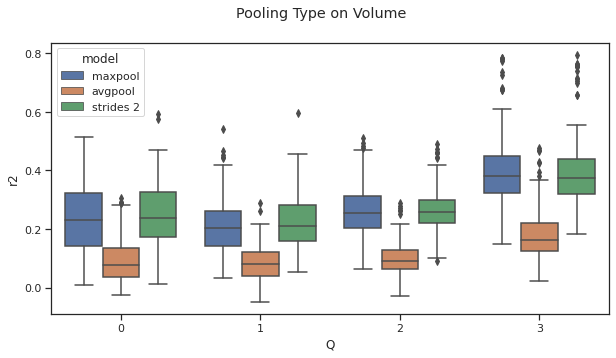

In [47]:
a = boxplot([ sfcn_pyr, sfcn_pyr_avg, sfcn_strides], [ 'maxpool' ,'avgpool', 'strides 2'], title='Pooling Type on Volume')

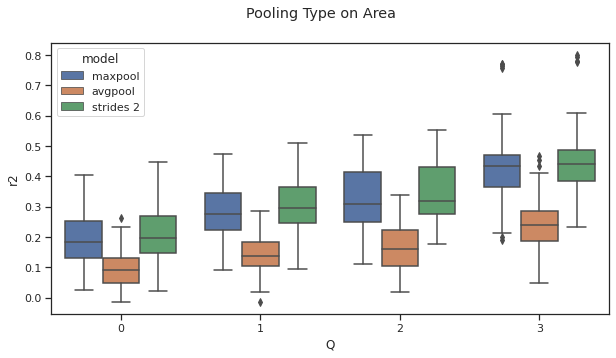

In [48]:
a = boxplot([sfcn_pyr, sfcn_pyr_avg, sfcn_strides], ['maxpool' ,'avgpool', 'strides 2'], group = 'area', title='Pooling Type on Area')

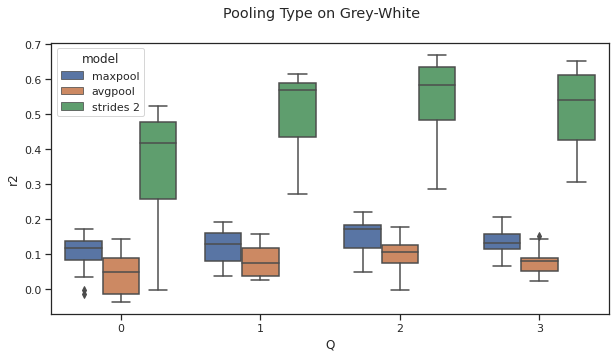

In [49]:
a = boxplot([sfcn_pyr, sfcn_pyr_avg, sfcn_strides], ['maxpool' ,'avgpool', 'strides 2'], group='grey white', title='Pooling Type on Grey-White')


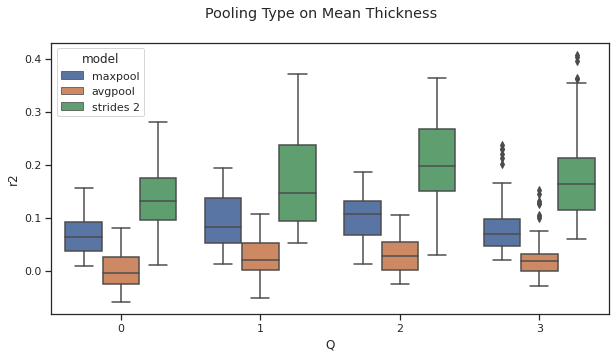

In [50]:
a = boxplot([sfcn_pyr, sfcn_pyr_avg, sfcn_strides], ['maxpool' ,'avgpool', 'strides 2'], group='mean thickness', title='Pooling Type on Mean Thickness')


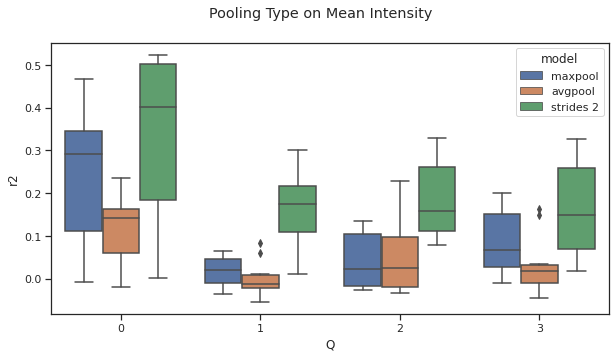

In [51]:
a = boxplot([sfcn_pyr, sfcn_pyr_avg, sfcn_strides ], ['maxpool' ,'avgpool', 'strides 2' ], group='mean intensity', title='Pooling Type on Mean Intensity')


# Kernel Size

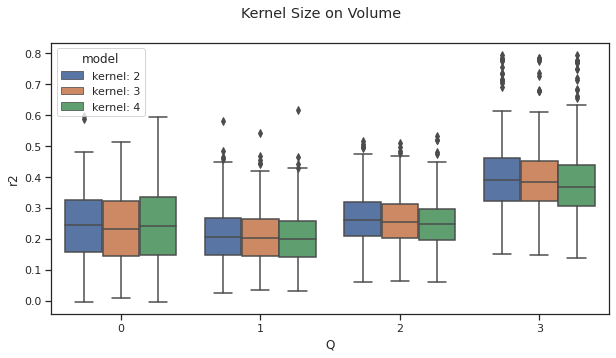

In [42]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], group='volume', title='Kernel Size on Volume')

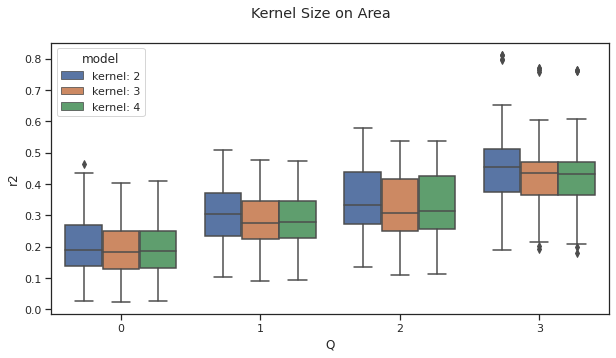

In [43]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], group='area', title='Kernel Size on Area')

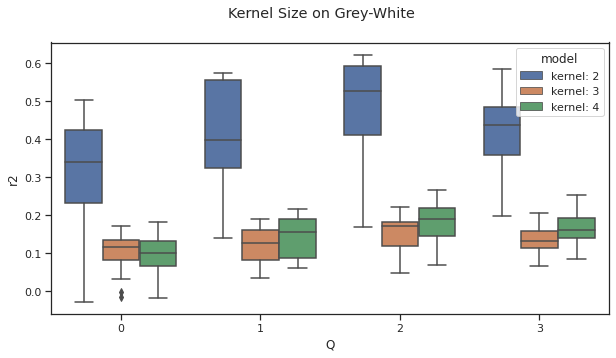

In [44]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], group='grey white', title='Kernel Size on Grey-White')

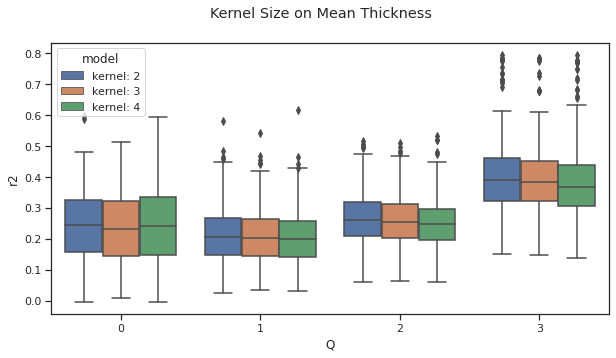

In [45]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], title='Kernel Size on Mean Thickness')

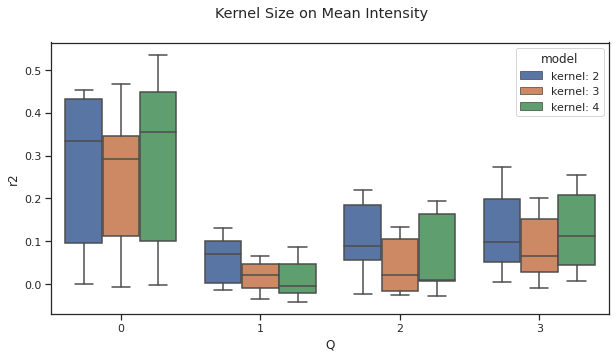

In [46]:
a = boxplot([ sfcn_small_kern, sfcn_pyr, sfcn_big_kern], [ 'kernel: 2' ,'kernel: 3', 'kernel: 4'], group='mean intensity', title='Kernel Size on Mean Intensity')

# scrathes

In [9]:
multi_r2 = 'sfcn_pyramid_nodrop_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nodrop_test_multi_mse.csv'
sfcn_pyr = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [11]:
multi_r2 = 'sfcn_pyramid_qn_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_qn_test_multi_mse.csv'
sfcn_pyr_avg_qn= get_grouped_desc(desc_file, multi_r2, multi_mse)

In [ ]:
a = boxplot([ sfcn_pyr, sfcn_pyr_avg, sfcn_strides], [ 'maxpool' ,'avgpool', 'strides 2'], title='Pooling Type on Volume')